## Resolver el problema del Mnist con Redes neuronales multicapa

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

Descargando el dataset **mnist**

In [3]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)


El dataset $\mathcal{D}$ está formado por las entradas $\mathbf{\mathcal{X}}$ y las salidas $\mathcal{Y}$. Donde $\mathbf{\mathcal{X}}$ tiene 70000 ejemplos con 784 componentes (features)

In [4]:
print('X tiene forma de : ', np.shape(X))
print('y tiene forma de : ', np.shape(y))

X tiene forma de :  (70000, 784)
y tiene forma de :  (70000,)


In [5]:
X[0:5,100:105]

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [6]:
y[0:5]

array(['5', '0', '4', '1', '9'], dtype=object)

In [7]:
max_x = np.max(X[0,:])
max_x

255.0

In [8]:
X = X/max_x

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(np.shape(X_train))
print(y_train[0:5])

(56000, 784)
['5' '4' '8' '0' '2']


Cual es el valor máximo que tiene **X**

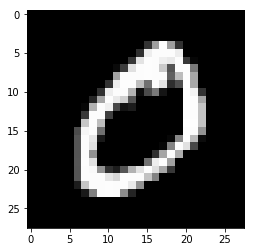

In [10]:
ejemplo_1 = X[1,:].reshape(28,28)
plt.imshow(ejemplo_1, cmap='gray')

In [11]:
red_mnist = MLPClassifier(hidden_layer_sizes=(50,), 
                          max_iter=1000,
                          alpha=1e-4,
                          solver='sgd',
                          verbose=10,
                          tol=1e-4,
                          random_state=1,
                          learning_rate_init=0.1,
                          early_stopping=True)

In [12]:
red_mnist.fit(X_train, y_train)

Iteration 1, loss = 0.34063459
Validation score: 0.935536
Iteration 2, loss = 0.16452324
Validation score: 0.950357
Iteration 3, loss = 0.12467594
Validation score: 0.960714
Iteration 4, loss = 0.09929109
Validation score: 0.961607
Iteration 5, loss = 0.08434841
Validation score: 0.966429
Iteration 6, loss = 0.07340417
Validation score: 0.967143
Iteration 7, loss = 0.06300494
Validation score: 0.966250
Iteration 8, loss = 0.05522086
Validation score: 0.968214
Iteration 9, loss = 0.05021341
Validation score: 0.970536
Iteration 10, loss = 0.04554517
Validation score: 0.968036
Iteration 11, loss = 0.04034108
Validation score: 0.968214
Iteration 12, loss = 0.03605949
Validation score: 0.970357
Iteration 13, loss = 0.03326069
Validation score: 0.968571
Iteration 14, loss = 0.02900176
Validation score: 0.970536
Iteration 15, loss = 0.02576854
Validation score: 0.970357
Iteration 16, loss = 0.02451592
Validation score: 0.969643
Iteration 17, loss = 0.02287873
Validation score: 0.966607
Iterat

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(50,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=10, warm_start=False)

Rendimiento del entrenamiento

In [13]:
red_mnist.score(X_train, y_train)


0.9868571428571429

Rendimiento del testeo

In [14]:
red_mnist.score(X_test, y_test)

0.9689285714285715

In [26]:
import random
muestra = random.randint(0, len(X_test))
muestra

10104

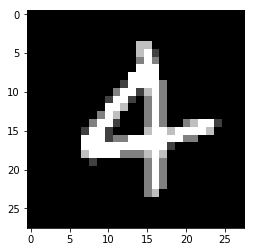

In [27]:
X_muestra = X_test[muestra,:]
X_grafico = X_muestra
plt.imshow(X_grafico.reshape(28,28), cmap='gray')

In [28]:
y_pred = red_mnist.predict(X_muestra.reshape(1,-1))
y_pred

array(['4'], dtype='<U1')

## Evaluación del Classificador
Para la evaluación del classificador se puede utilizar la matriz de confusión y el reporte del clasificador

In [35]:
y_pred = red_mnist.predict(X_test)

In [37]:
from sklearn.metrics import classification_report
cr = classification_report(y_true=y_test, y_pred=y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1343
           1       0.98      0.98      0.98      1600
           2       0.96      0.97      0.97      1380
           3       0.97      0.96      0.96      1433
           4       0.97      0.96      0.97      1295
           5       0.97      0.96      0.97      1273
           6       0.98      0.98      0.98      1396
           7       0.97      0.97      0.97      1503
           8       0.94      0.96      0.95      1357
           9       0.96      0.96      0.96      1420

   micro avg       0.97      0.97      0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



In [38]:
from sklearn.metrics import confusion_matrix
labels = ['0', '1','2', '3', '4', '5', '6', '7', '8', '9']
cm = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=labels)
cm

array([[1325,    1,    2,    0,    1,    1,    2,    2,    8,    1],
       [   0, 1576,    6,    2,    2,    0,    1,    4,    8,    1],
       [   5,    4, 1340,    3,    3,    2,    5,    8,    8,    2],
       [   3,    1,   13, 1369,    1,   12,    0,    8,   20,    6],
       [   5,    0,    6,    2, 1240,    2,    4,    3,    3,   30],
       [   3,    5,    1,   16,    2, 1223,    7,    2,   13,    1],
       [   4,    2,    3,    0,    5,    9, 1370,    0,    3,    0],
       [   2,    3,   13,    3,    5,    1,    1, 1461,    2,   12],
       [   3,   10,    9,    8,    3,    5,    3,    7, 1300,    9],
       [   6,    4,    2,    4,   11,    4,    0,   15,   13, 1361]])

## Conclusión

Para resolver el problema de reconocimmiento de dígitos de la base de datos MNIST con Redes neuronales multicapa (Feed Forward Neural Nets) cada imagen de $28 \times 28$ se transforma en el vector de componentes **x** de 784 valores. Con los valores indicados para el entrenamiento se ha logrado entrenar una red capaz de reconocer este dataset

# Convolutional Neural Networks
## Convolución bidimensional

Proponga una función de python para calcular la convolución de una matriz de $5 \times 5$ con un kernel de $3\times3$. Considere un stride de 1

In [29]:
imagen =np.array([[3,3,2,1,0],[0,0,1,3,1],[3,1,2,2,3],[2,0,0,2,2], [2,0,0,0,1]])
imagen

array([[3, 3, 2, 1, 0],
       [0, 0, 1, 3, 1],
       [3, 1, 2, 2, 3],
       [2, 0, 0, 2, 2],
       [2, 0, 0, 0, 1]])

In [30]:
kernel = np.array([[0,1,2],[2,2,0], [0,1,2]])
kernel

array([[0, 1, 2],
       [2, 2, 0],
       [0, 1, 2]])

In [34]:
stride = 1
kernel_filas, kernel_col = np.shape(kernel)
imagen_filas, imagen_col = np.shape(imagen)

conv_imagen_filas = imagen_filas-kernel_filas+1
conv_imagen_col = imagen_col-kernel+1
conv_imagen = np.zeros(conv_imagen_filas, conv_imagen_col)

sub_imagen = imagen[0:kernel_filas, 0:kernel_col]
conv = np.sum(np.multiply(sub_imagen, kernel))
conv

12

## Resolviendo el mnist con ConVNet
A continuación se propone una red neuronal convolucional para clasificar los dígitos del 0 al 9

Primero importamos el dataset desde la librería de Keras

In [60]:
from keras.datasets import mnist
(X_train_cnn, y_train_cnn), (X_test_cnn, y_test_cnn) = mnist.load_data()

Grafiquemos la 0 *muestra* del dataset de entrenamiento:

El dataset de entrenamiento tiene una forma de: (60000, 28, 28)


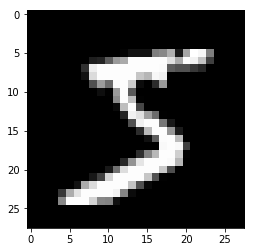

In [61]:
print('El dataset de entrenamiento tiene una forma de: {}'.format(np.shape(X_train_cnn)))
plt.imshow(X_train_cnn[0], cmap='gray')

Note que cada ejemplo o muestra tanto del dataset de entrenamiento como de testeo contiene imagenes de $28 \times 28$ a diferencia del dataset que se utilizó para la red neuronal multicapa en que cada muestra contenía arreglos de $28^2$

In [62]:
X_train_cnn[0].shape

(28, 28)

La correspondiente etiqueta para la muestra es:

In [63]:
y_train_cnn[0]

5

Para resolver la convolucional es necesario poner en el siguiente formato los datos: <numero_muestras, tamano_h, tamano_v, canales_imagen>

In [64]:
X_train_cnn = X_train_cnn.reshape(60000,28,28,1)
X_test_cnn = X_test_cnn.reshape(10000,28,28,1)

Como es un problema de **clasificacion** se debe dar formato **one hot** a las salidas $\mathcal{Y}$

In [65]:
from keras.utils import to_categorical
y_train_cnn = to_categorical(y_train_cnn)
y_test_cnn = to_categorical(y_test_cnn)

Observemos como queda en formato **one hot** la etiqueta de la muestra **0**

In [66]:
y_train_cnn[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Construimos un modelo de red neuronal convolucional

In [67]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten_3 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


**Compilación del modelo:** En donde asignamos la función de costo a optimizar (*categorical cross entropy*) y el algoritmo de optimización (*adam*) y una métrica para evaluar el desempeño del entrenamiento (*accuracy*)

In [68]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Procedemos a entrenar la red. El total de parametros a entrenar es de 203434

In [69]:
history = model.fit(X_train_cnn, y_train_cnn, validation_data=(X_test_cnn, y_test_cnn), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 58s 967us/step - loss: 1.1804 - acc: 0.8917 - val_loss: 0.0895 - val_acc: 0.9738
Epoch 2/10
60000/60000 [==============================] - 68s 1ms/step - loss: 0.0721 - acc: 0.9780 - val_loss: 0.1016 - val_acc: 0.9693
Epoch 3/10
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0492 - acc: 0.9846 - val_loss: 0.0798 - val_acc: 0.9763
Epoch 4/10
60000/60000 [==============================] - 71s 1ms/step - loss: 0.0372 - acc: 0.9887 - val_loss: 0.1075 - val_acc: 0.9725
Epoch 5/10
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0269 - acc: 0.9916 - val_loss: 0.0988 - val_acc: 0.9768
Epoch 6/10
60000/60000 [==============================] - 79s 1ms/step - loss: 0.0239 - acc: 0.9929 - val_loss: 0.1101 - val_acc: 0.9777
Epoch 7/10
60000/60000 [==============================] - 77s 1ms/step - loss: 0.0206 - acc: 0.9938 - val_loss: 0.1415 - val_a

Text(0.5,1,'Training and validation loss')

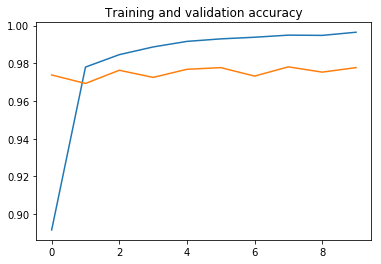

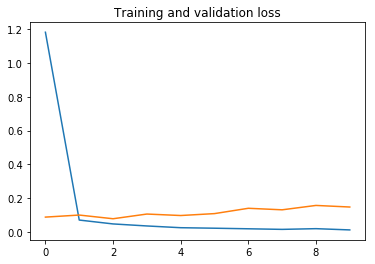

In [70]:
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )